In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


<Axes: >

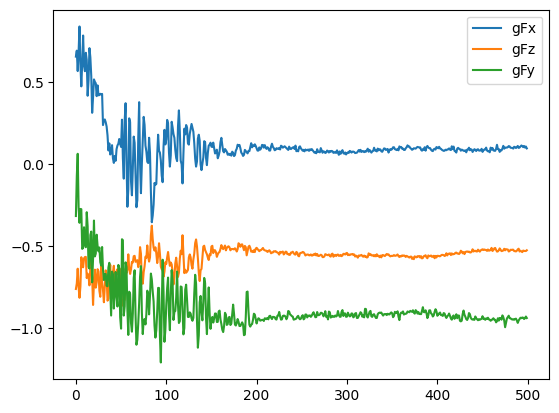

In [28]:

def create_file(path, n, trim : bool = False):
  test = pd.read_csv(path)
  test.drop(columns = ["TgF"], inplace = True)
  test_ = signal.resample(test[["gFx", "gFy", "gFz"]], n)

  test_ = pd.DataFrame(test_, columns = ["gFx", "gFz", "gFy"])
  test_ = - 1 * test_
  if trim:
    test_.columns = ["gFx", "gFy", "gFz"]
    return test_
  return test_.iloc[200:700, :].reset_index(drop = True)

r = create_file("Rawdata\\Aarsh_laying_1.csv", 1500)
r.plot()

In [29]:
# Our static: n=1500
# Our dynamic: n=1000
# Hari: All 500.

In [30]:
def save_file(path, n, trim : bool = False):
  test = create_file(path, n, trim)
  test.to_csv("ProcessedData\\" + path.split("\\")[-1], index = False)

In [31]:
# For all files in the Rawdata directory, process them and save them in the ProcessedData directory.
# If the filename has "Hari" in it, then we will use n=500 and trim=True, else if it has "sitting", "standing", "laying", then we will use n=1500. Otherwise, we will use n=1000.
import os
for file in os.listdir("Rawdata"):
  if "Hari" in file:
    save_file("Rawdata\\" + file, 500, True)
  elif "sitting" in file or "standing" in file or "laying" in file or "Sitting" in file or "Standing" in file or "Laying" in file:
    save_file("Rawdata\\" + file, 1500)
  else:
    save_file("Rawdata\\" + file, 1000)

<Axes: >

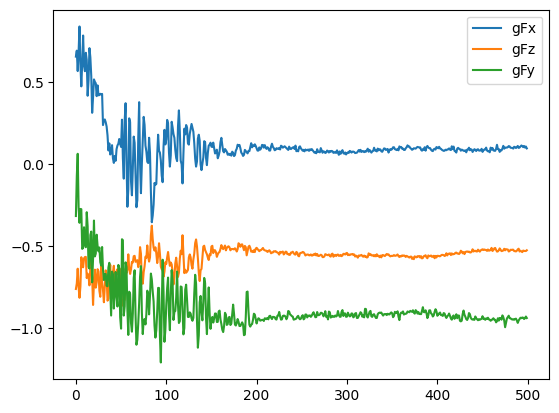

In [32]:
test = pd.read_csv("ProcessedData\\Aarsh_laying_1.csv")
test.plot()